# Introduction to Machine Learning

Introduction

The goal of this exercise is to develop machine learning models so that you can use features of a property (eg. number of rooms, number of bathrooms, distance from city center, etc.) to help you predict the price of the property. We will use several, simple machine learning models: Decision Tree, Random Forest, and XGBoost.

In [2]:
# You may need to to download and install the specified packages
# pip install kaggle
# pip install --user kaggle (on Mac/Linux)

#libraries and packages to import
import pandas as pd
from google.colab import files
from datetime import datetime
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

ModuleNotFoundError: No module named 'google.colab'

The first machine learning model we'll try is called Decision Tree. You can follow this turorial on Kaggle: https://www.kaggle.com/code/dansbecker/how-models-work

Decision Tree with one layer of depth


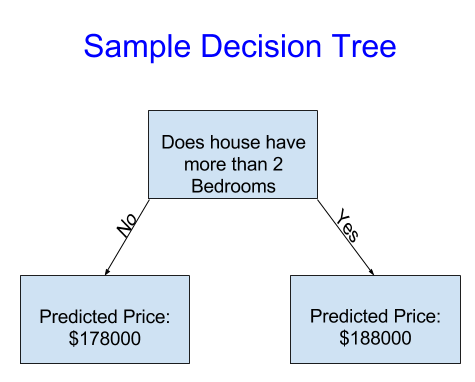

In [ ]:
#Show an illustration for a simple decision tree
print("Decision Tree with one layer of depth")
Image("https://storage.googleapis.com/kaggle-media/learn/images/7tsb5b1.png")

Decision Tree with more depth


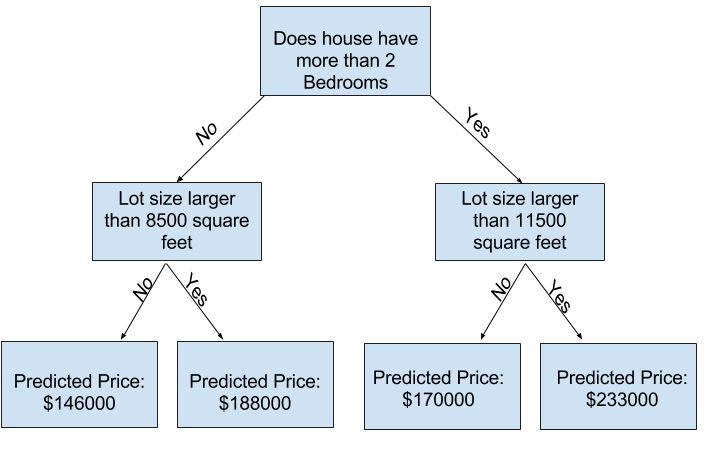

In [ ]:
#Show an illustration for a more sophisticated decision tree
print("Decision Tree with more depth")
Image('https://storage.googleapis.com/kaggle-media/learn/images/R3ywQsR.png')

# Section 1: Preparing, Understanding, and Cleaning Your Data

**Preparing your data**

Link to Melbourne Dataset: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot/data

Melbourne housting dataset has pricing and house details of 13,500 houses in Melbourne suburbs and 21 columns of data for each house including address, number of rooms, garage size, year built, number of bathrooms, number of carspots, distance from central business district, etc. You can read more about the dataset from the link.

In [ ]:
################################################################################
#### TO DO: Download the Melbourne Housing Dataset to your computer then upload the dataset into this CoLab notebook
################################################################################

uploaded = files.upload()

Saving melb_data.csv to melb_data.csv


**Understanding your data**

Upload your data into a dataframe, view the first five rows, and describe it using statistics

In [ ]:
####################### Understanding your data ################################

# Create a dataframe called "melbourne_data." You may need to replace 'melb_data.csv' with the actual name of your CSV file, if it is different
melbourne_data = pd.read_csv('melb_data.csv')

# Display the first five rows of the dataset
print("The first five rows in the dataset")
print(melbourne_data.head())
print()
print()

# Print a summary of the data in the DataFrame
print("Important statistics from the dataset")
print(melbourne_data.describe())

################################################################################
#### TO DO: Q1.1 How many entries are in this dataset (i.e. how many rows in the dataframe)?
################################################################################

################################################################################
#### TO DO: Q1.2 Find the average landsize of all of the properties. All sizes are in square meters.
################################################################################

################################################################################
#### TO DO: Q1.3 Find the price of the newest home in the dataset. All prices are in dollars.
################################################################################

################################################################################
#### TO DO: Q1.4 Which columns have incomplete data? For example, which columns don't have 13,580 entries?
################################################################################

The first five rows in the dataset
       Suburb           Address  Rooms Type    Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5      3067  ...         1  1.0       202           NaN   
1   4/2/2016       2.5      3067  ...         1  0.0       156          79.0   
2   4/3/2017       2.5      3067  ...         2  0.0       134         150.0   
3   4/3/2017       2.5      3067  ...         2  1.0        94           NaN   
4   4/6/2016       2.5      3067  ...         1  2.0       120         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude          

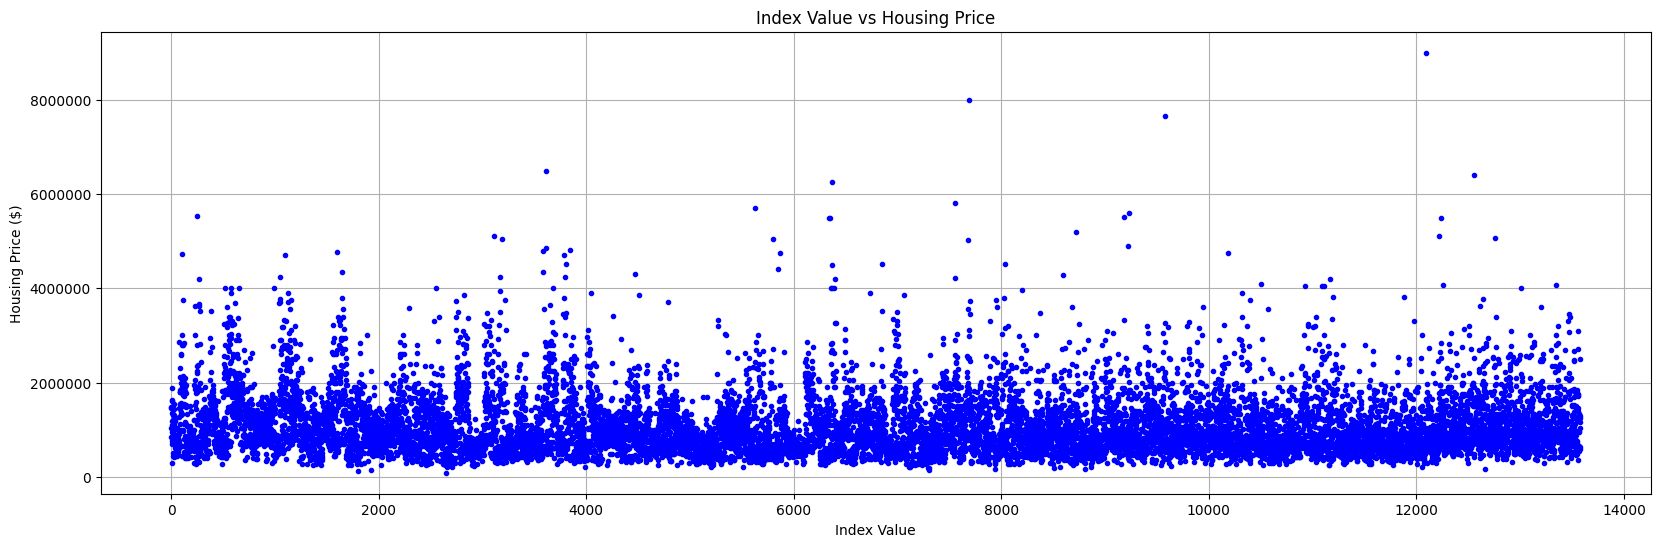

In [ ]:
# Plot the index value versus price for the 13,580 entries. The index value refers to the position of the entry within the dataframe.
# The first entry has an index value of 0. The second entry has an index value of 1, etc.

################################################################################
#### TO DO: Q1.5 What is a pandas datafram? What is an index value?
################################################################################

# Extracting the index values and housing prices
index_values = melbourne_data.index
housing_prices = melbourne_data['Price']

# Plotting index value vs housing price
plt.figure(figsize=(20, 6))
plt.plot(index_values, housing_prices, marker='o', linestyle='', color='b', markersize=3)  # Adjust markersize as needed
plt.title('Index Value vs Housing Price')
plt.xlabel('Index Value')
plt.ylabel('Housing Price ($)')
plt.grid(True)

# Disable scientific notation
plt.ticklabel_format(style='plain', axis='both')

plt.show()

**Cleaning your data**

             Rooms         Price     Distance     Postcode     Bedroom2  \
count  6196.000000  6.196000e+03  6196.000000  6196.000000  6196.000000   
mean      2.931407  1.068828e+06     9.751097  3101.947708     2.902034   
std       0.971079  6.751564e+05     5.612065    86.421604     0.970055   
min       1.000000  1.310000e+05     0.000000  3000.000000     0.000000   
25%       2.000000  6.200000e+05     5.900000  3044.000000     2.000000   
50%       3.000000  8.800000e+05     9.000000  3081.000000     3.000000   
75%       4.000000  1.325000e+06    12.400000  3147.000000     3.000000   
max       8.000000  9.000000e+06    47.400000  3977.000000     9.000000   

          Bathroom          Car      Landsize  BuildingArea    YearBuilt  \
count  6196.000000  6196.000000   6196.000000   6196.000000  6196.000000   
mean      1.576340     1.573596    471.006940    141.568645  1964.081988   
std       0.711362     0.929947    897.449881     90.834824    38.105673   
min       1.000000  

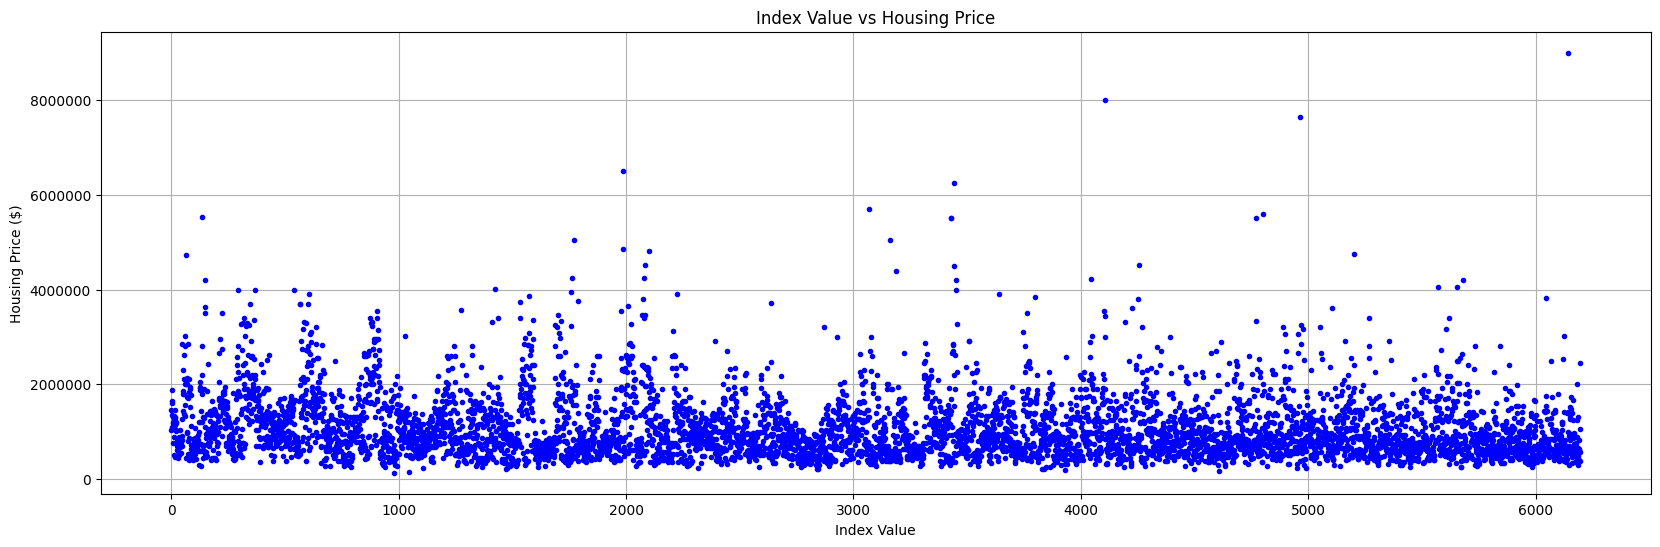

In [ ]:
############################ Cleaning your data ################################

# The Melbourne data has some missing values (some houses for which some variables weren't recorded.) We'll drop these entries using the following command.
melbourne_data = melbourne_data.dropna(axis=0)
melbourne_data.reset_index(drop=True, inplace=True)
print(melbourne_data.describe())
print()

################################################################################
#### TO DO: Q1.6 How many entries are in the new dataset?
################################################################################

# Extracting the index values and housing prices
index_values = melbourne_data.index
housing_prices = melbourne_data['Price']

# Plotting index value vs housing price
plt.figure(figsize=(20, 6))
plt.plot(index_values, housing_prices, marker='o', linestyle='', color='b', markersize=3)  # Adjust markersize as needed
plt.title('Index Value vs Housing Price')
plt.xlabel('Index Value')
plt.ylabel('Housing Price ($)')
plt.grid(True)

# Disable scientific notation
plt.ticklabel_format(style='plain', axis='both')

plt.show()

# Section 2: Building a Machine Learning Model

**Selecting Features**

In [ ]:
############################# Selecting features ###############################

# Because we want to predict a house's value based on its features (i.e. number of bedrooms, number of bathrooms, etc), we can set one of the columns as the prediction target.
# In this case, the "Price" is the prediction target. Conventionally, this prediction target is called "y"
y = melbourne_data.Price

# We'll start by selecting a few features which we may play an important role in determining the price of a house.
# To select some features, we'll need to see a list of all columns in the dataset.
# The columns that are inputted into our model (and later used to make predictions) are called "features."
# Sometimes, you will use all columns except the target ("Price") as features. Other times you'll be better off with fewer features.
# For now, we'll build a model with only a few features. Later on you'll see how to iterate and compare models built with different features.
print(melbourne_data.columns)    #prints the list of column names
type(melbourne_data.columns)
print()

################################################################################
#### TO DO: Q2.1 What are the names of all the columns in the dataset? How many columns in the dataset?
################################################################################


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')



In [ ]:
# We select multiple features by providing a list of column names inside brackets. Each item in that list should be a string (with quotes).
# We'll be using these five features to predict house prices.

melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt']
X = melbourne_data[melbourne_features]

# Let's quickly review the data we'll be using to predict house prices using the describe method and the head method, which shows the top few rows.
X.describe()

,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,141.568645,1964.081988
std,0.971079,0.711362,897.449881,90.834824,38.105673
min,1.000000,1.000000,0.000000,0.000000,1196.000000
25%,2.000000,1.000000,152.000000,91.000000,1940.000000
50%,3.000000,1.000000,373.000000,124.000000,1970.000000
75%,4.000000,2.000000,628.000000,170.000000,2000.000000
max,8.000000,8.000000,37000.000000,3112.000000,2018.000000


In [ ]:
#use the .head() command to check the first five rows of data
X.head()

,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt
0,2,1,156,79.0,1900.0
1,3,2,134,150.0,1900.0
2,4,1,120,142.0,2014.0
3,3,2,245,210.0,1910.0
4,2,1,256,107.0,1890.0


In [ ]:
################################################################################
#### TO DO: Q2.2 Plot a graph of building area (x-axis) vs housing price (y-axis). Include this plot in your deliverable
################################################################################

**Build a Machine Learning Model**

You will use the scikit-learn library to create your models. When coding, this library is written as sklearn, as you will see in the sample code. Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames.

The steps to building and using a model are:


1.   Define: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.
2.   Fit: Capture patterns from provided data. This is the heart of modeling
1.   Predict: Just what it sounds like
2.   Evaluate: Determine how accurate the model's predictions are.

In [ ]:
################### Build a Machine Learning Model #############################

# Here is an example of defining a decision tree model with scikit-learn and fitting it with the features and target variable.
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=2)   # Many machine learning models allow some randomness in model training.. Specifying a number for random_state ensures you get the same results in each run.

# Fit the model
melbourne_model.fit(X, y)
print("Congratulations! You just made a machine learning model called Decision Tree. This model can be used to make house price predictions!")


Congratulations! You just made a machine learning model called Decision Tree. This model can be used to make house price predictions!


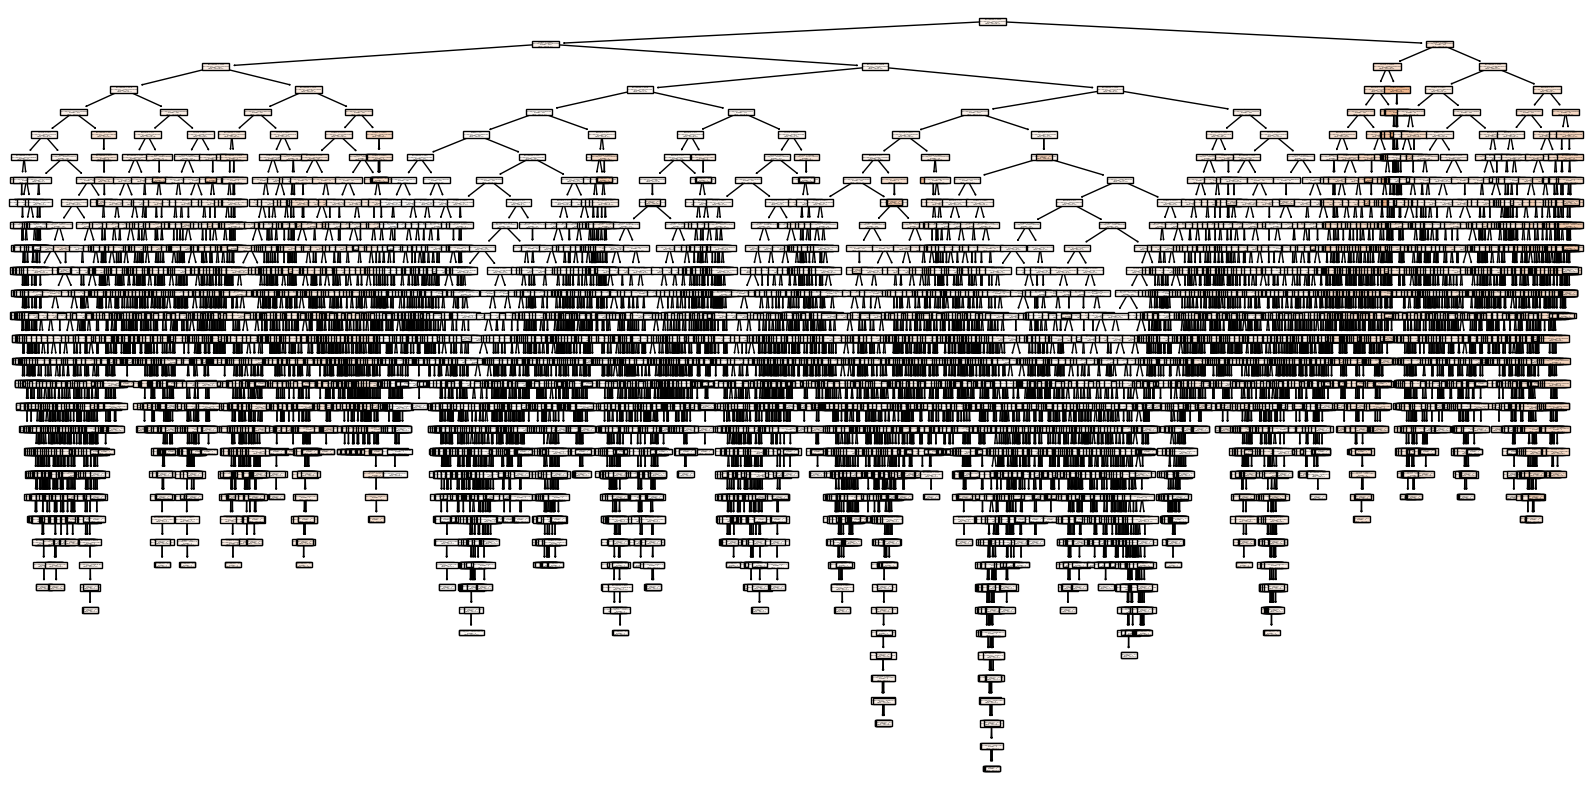

      Price  Predicted_Price  Rooms  Bathroom  Landsize  BuildingArea  \
0   1035000        1035000.0      2         1       156          79.0   
1   1465000        1465000.0      3         2       134         150.0   
2   1600000        1600000.0      4         1       120         142.0   
3   1876000        1876000.0      3         2       245         210.0   
4   1636000        1636000.0      2         1       256         107.0   
5   1097000        1097000.0      2         1       220          75.0   
6   1350000        1350000.0      3         2       214         190.0   
7    750000         750000.0      2         2         0          94.0   
8   1310000        1310000.0      2         1       238          97.0   
9   1200000        1200000.0      3         2       113         110.0   
10  1176500        1176500.0      3         1       138         105.0   
11   890000         890000.0      2         1       150          73.0   
12  1330000        1330000.0      4         2      

In [ ]:
# We now have a fitted model that we can use to make predictions.

# Make predictions for all houses in your dataset
predictions = melbourne_model.predict(X)

# Create a new DataFrame with the predicted prices added as a new column
predicted_data = melbourne_data.copy()  # Create a copy of the original DataFrame
predicted_data['Predicted_Price'] = predictions  # Add a new column for predicted prices

# You can visualize the decision tree, by uncommenting the three lines of code below
#plt.figure(figsize=(20, 10))  # Adjust figure size as needed
#plot_tree(melbourne_model, filled=True, feature_names=['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt'])
#plt.show()

# Print the first five rows of the DataFrame with predicted prices
print(predicted_data[['Price', 'Predicted_Price', 'Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt']].head(n=15))

################################################################################
#### TO DO: Q2.3 Review the actual price ("Price") and predicted price ("Predicted Price") and summarize your thoughts. Look at the first fifteen rows of the dataframe.
################################################################################

You've built a model. But how good is it?

We can use model validation to measure the quality of our model. Measuring model quality is the key to iteratively improving our  models.

There are many metrics for summarizing model quality, but we'll start with one called Mean Absolute Error, also called MAE. The prediction error for each house is: error = actual price - predicted price

So if a house cost 150,000 USD and you predicted it would cost 100,000 USD the error is 50,000 USD. With the MAE metric, we take the absolute value of each error. This converts each error to a positive number. We then take the average of those absolute errors. The MAE is our measure of model quality. With the MAE, we can say, "on average, our predictions are off by about X amount."


In [ ]:
#the library/package we must import to calculate MAE
from sklearn.metrics import mean_absolute_error

#Here's how we calculate mean absolute error:
predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

################################################################################
#### TO DO: Q2.4 Is a model better with a lower MAE or a higher MAE? Explain.
################################################################################

################################################################################
#### TO DO: Q2.5 What is the MAE for your model? Why do we take the absolute value of the difference between the actual price and the predicted price?
################################################################################

**Splitting your Data between Training and Validation Data**

Since models' practical value come from making predictions on new data, we measure performance on data that wasn't used to build the model. The most straightforward way to do this is to exclude some data from the model-building process, and then use those excluded data to test the model's accuracy on data it hasn't seen before. The data that your model has not been trained on is called validation data.

In [ ]:
# The scikit-learn library has a function train_test_split to break up the data into two pieces.
# We'll use some of that data as training data to fit the model, and we'll use the other data as validation data to calculate mean_absolute_error.

# Here's the code:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to the random_state argument guarantees we get the same split every time we run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# Define model
melbourne_model = DecisionTreeRegressor()

# Fit model
melbourne_model.fit(train_X, train_y)
print("Congratulations!  You've made a new machine learning model with training data!")
print()

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print("And you've tested your model on data that the model has never seen before (validation data).")
print()
print("The mean absolute error for your new model is:")
print(mean_absolute_error(val_y, val_predictions))

################################################################################
#### TO DO: Q2.6 What is the MAE for your new model? Why is the MAE for the new model larger than the MAE from our previous model?
################################################################################

In [ ]:
# Create an array of indices for both training and testing data
train_indices = np.arange(len(train_y))
val_indices = np.arange(len(val_y))

# Plot training data
plt.figure(figsize=(20, 6))
plt.scatter(train_indices, train_y, color='blue', label='Training Data')

# Plot testing data
plt.scatter(val_indices, val_y, color='red', label='Testing Data')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Training and Testing Data')
plt.legend()
plt.show()

## What percent of the data is used for training and what percent of the data is used for testing? ####
total_samples = len(X)        #Find the total number of samples in your dataset
train_samples = len(train_X)  #Find the total number of samples in your training data
test_samples = len(val_X)     #Find the total number of samples in your validation data

train_percentage = (train_samples / total_samples) * 100
test_percentage = (test_samples / total_samples) * 100
print()
print("Training data percentage:", train_percentage)
print("Testing data percentage:", test_percentage)

################################################################################
#### TO DO: Q2.7 What percentage of your entries is used for training the model? What percentage of your entries is used for testing the model?
################################################################################

# Section 3: Adjusting your Machine Learning Model

Let's experiment with alternative models and see which gives the best predictions. You can see in scikit-learn's documentation that the decision tree model has many options.

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

Recall that a tree's depth is a measure of how many splits it makes before coming to a prediction. In practice, it's not uncommon for a tree to have 10 splits between the top level (all houses) and a leaf.

As the tree gets deeper, the dataset gets sliced up into leaves with fewer houses. If a tree only had 1 split, it divides the data into 2 groups. If each group is split again, we would get 4 groups of houses.

Splitting each of those again would create 8 groups. If we keep doubling the number of groups by adding more splits at each level, we'll have  210  groups of houses by the time we get to the 10th level. That's 1024 leaves.

When we divide the houses amongst many leaves, we also have fewer houses in each leaf. Leaves with very few houses will make predictions that are quite close to those homes' actual values, but they may make very unreliable predictions for new data (because each prediction is based on only a few houses). This is a phenomenon called overfitting, where a model matches the training data almost perfectly, but does poorly in validation and other new data.

On the flip side, if we make our tree very shallow (eg. 2-4 splits), it doesn't divide up the houses into very distinct groups. In this situation, resulting predictions may be far off for most houses, even in the training data. When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called underfitting.

There are a few ways to find the best tree depth, and many allow for some routes through the tree to have greater depth than other routes. But the max_leaf_nodes argument provides a very sensible way to control overfitting vs underfitting

In [ ]:
# Let's define a function to help compare MAE scores from different values for max_leaf_nodes:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

# We can use a for-loop to compare the accuracy of models built with different values for max_leaf_nodes.

# Initialize variables to store the minimum MAE and the corresponding value of max_leaf_nodes
min_mae = float('inf')
best_max_leaf_nodes = None

# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

    # Update the minimum MAE and corresponding max_leaf_nodes if a new minimum is found
    if my_mae < min_mae:
        min_mae = my_mae
        best_max_leaf_nodes = max_leaf_nodes

# Output the max leaf nodes with the smallest mean absolute error
print("\nMax leaf nodes with the smallest mean absolute error:", best_max_leaf_nodes)

################################################################################
#### TO DO: Q3.1 What does the max leaf nodes argument describe for a Decision Tree model?
################################################################################

### Q3.1 What does the max leaf nodes argument describe for a Decision Tree model?

The `max_leaf_nodes` argument in a Decision Tree model specifies the maximum number of leaf nodes the tree can have. Limiting the number of leaf nodes helps control the model's complexity, balancing between overfitting and underfitting. Overfitting occurs when the model is too complex, capturing noise in the training data, which leads to poor performance on new data. Underfitting happens when the model is too simple to capture the underlying structure of the data, resulting in poor performance both on training and new data. Adjusting `max_leaf_nodes` is a way to find a sweet spot where the model is complex enough to capture essential patterns without fitting to the noise.

Decision Tree with one layer of depth (and two leaves)



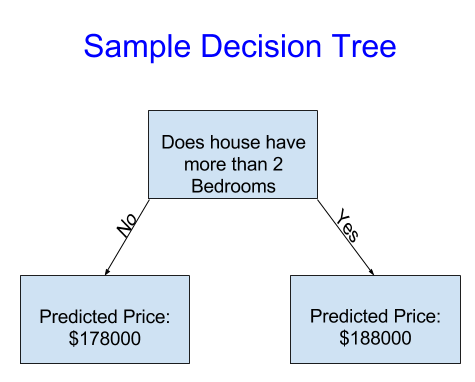

In [ ]:
print("Decision Tree with one layer of depth (and two leaves)")
print()
Image("https://storage.googleapis.com/kaggle-media/learn/images/7tsb5b1.png")

In [ ]:
################################################################################
#### TO DO: Q3.2 Write a script which finds the optimal number of max leaf nodes for your Decision Tree model. What is the optimal number of max leaf nodes?
################################################################################

### Q3.2 Write a script which finds the optimal number of max leaf nodes for your Decision Tree model. What is the optimal number of max leaf nodes?

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Load the dataset
melbourne_data = pd.read_csv('melb_data.csv')

# Select the target variable and features. Assuming 'Price' is the target variable.
y = melbourne_data['Price']
features = ['Rooms', 'Distance']  # Assuming 'Type' needs to be encoded if it's categorical

# For simplicity, let's ignore 'Type' for now unless it's numeric. If 'Type' is categorical, you would typically use pd.get_dummies() to convert it to a format suitable for modeling.
X = melbourne_data[features]

# Split data into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return mae

# Define the range of `max_leaf_nodes` to test
max_leaf_nodes_options = [5, 50, 500, 5000]

# Initialize variables to store the minimum MAE and the optimal number of max_leaf_nodes
min_mae = float('inf')
best_max_leaf_nodes = None

# Find the optimal number of max_leaf_nodes
for max_leaf_nodes in max_leaf_nodes_options:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print(f"Max leaf nodes: {max_leaf_nodes} \t\t Mean Absolute Error:  {my_mae}")
    
    if my_mae < min_mae:
        min_mae = my_mae
        best_max_leaf_nodes = max_leaf_nodes

print(f"\nOptimal number of max leaf nodes: {best_max_leaf_nodes}")


Max leaf nodes: 5 		 Mean Absolute Error:  362208.44519981806
Max leaf nodes: 50 		 Mean Absolute Error:  320536.05856001494
Max leaf nodes: 500 		 Mean Absolute Error:  296622.1652119891
Max leaf nodes: 5000 		 Mean Absolute Error:  296046.56250849954

Optimal number of max leaf nodes: 5000


# Section 4: Use Different Machine Learning Models

In [ ]:
#### Random Forest Model ####

# The random forest uses many trees, and it makes a prediction by averaging the predictions of each component tree.
# It generally has much better predictive accuracy than a single decision tree and it works well with default parameters.
# If you keep modeling, you can learn more models with even better performance, but many of those are sensitive to getting the right parameters.

#import the libraries need to run and evaluate a Random Forest ML model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

################################################################################
#### TO DO: Q4.1 What is the MAE for your Random Forest model?
################################################################################

################################################################################
#### TO DO: Q4.2 What is the difference between Decision Tree and Random Forest models?
################################################################################

################################################################################
#### TO DO: Q4.3 Use the machine learning model XGBoost to train and test a new model. What is the MAE for your XGBoost model?
################################################################################

#import the libraries need to run a XGBoost Model
from xgboost import XGBRegressor